# Classification with PyCaret

Hi Guys, Welcome to Tirendaz Academy 😀
In this notebook, I will talk about classification with PyCaret.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from pycaret.classification import *

In [5]:
s = setup(data, target = "Class variable")

,Description,Value
0,session_id,7016
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7599,0.8160,0.5529,0.6897,0.6095,0.4410,0.4487,0.4710
lda,Linear Discriminant Analysis,0.7599,0.8063,0.5368,0.6984,0.6011,0.4362,0.4464,0.0040
ridge,Ridge Classifier,0.7580,0.0000,0.5257,0.6998,0.5951,0.4298,0.4410,0.0030
ada,Ada Boost Classifier,0.7580,0.8052,0.6117,0.6671,0.6321,0.4538,0.4591,0.0170
rf,Random Forest Classifier,0.7430,0.8092,0.5249,0.6620,0.5834,0.4017,0.4085,0.0390
gbc,Gradient Boosting Classifier,0.7412,0.7946,0.5567,0.6542,0.5972,0.4087,0.4148,0.0180
et,Extra Trees Classifier,0.7376,0.7979,0.5085,0.6528,0.5693,0.3859,0.3932,0.0390
lightgbm,Light Gradient Boosting Machine,0.7095,0.7750,0.5354,0.5965,0.5610,0.3451,0.3487,0.0100
dt,Decision Tree Classifier,0.6929,0.6604,0.5567,0.5625,0.5581,0.3230,0.3239,0.0030
knn,K Neighbors Classifier,0.6927,0.7499,0.4602,0.5616,0.4986,0.2845,0.2901,0.2370


In [7]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7016, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [8]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

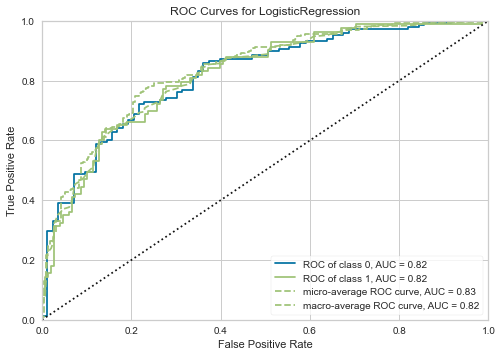

In [9]:
plot_model(best, plot = "auc")

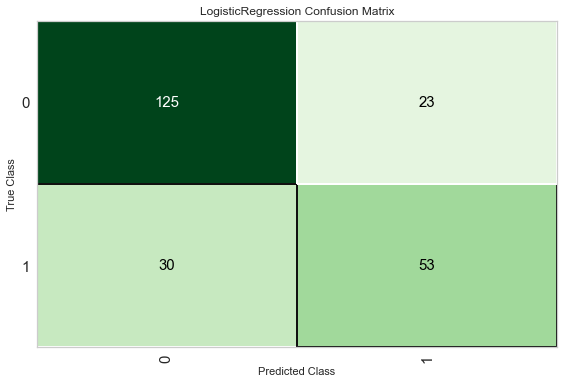

In [10]:
plot_model(best, plot = "confusion_matrix")

In [11]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7706,0.8181,0.6386,0.6974,0.6667,0.4923,0.4934


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,167.0,0.0,0.0,0.0,32.299999,0.839,30.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8636
1,158.0,90.0,0.0,0.0,31.600000,0.805,66.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7278
2,97.0,68.0,21.0,0.0,27.200001,1.095,22.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9222
3,195.0,70.0,0.0,0.0,30.900000,0.328,31.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8280
4,80.0,80.0,36.0,0.0,39.799999,0.177,28.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,110.0,66.0,0.0,0.0,31.900000,0.471,29.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8009
227,125.0,76.0,0.0,0.0,33.799999,0.121,54.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.6262
228,101.0,64.0,17.0,0.0,21.000000,0.252,21.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9457
229,123.0,100.0,35.0,240.0,57.299999,0.880,22.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.7826


In [13]:
prediction = predict_model(best, data = data)
prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7747,0.8362,0.5858,0.7169,0.6448,0.4823,0.4875


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.7368
1,1,85,66,29,0,26.6,0.351,31,0,0,0.9640
2,8,183,64,0,0,23.3,0.672,32,1,1,0.8148
3,1,89,66,23,94,28.1,0.167,21,0,0,0.9729
4,0,137,40,35,168,43.1,2.288,33,1,1,0.9147


In [14]:
save_model(best, "my_best_pipeline")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_we

In [15]:
loaded_model = load_model("my_best_pipeline")

Transformation Pipeline and Model Successfully Loaded


In [16]:
print(loaded_model)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                           

Don't forget to follow on [YouTube](https://youtube.com/c/tirendazacademy), [Medium](https://tirendazacademy.medium.com), [Twitter](https://twitter.com/tirendazacademy), [YouTube](https://www.linkedin.com/in/tirendaz-academy), [GitHub](https://github.com/TirendazAcademy)